##  Wine Quality Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Collecting the data
wine_dataset = pd.read_csv("winequality-red.csv")

In [3]:
wine_dataset.shape

(1599, 12)

In [4]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

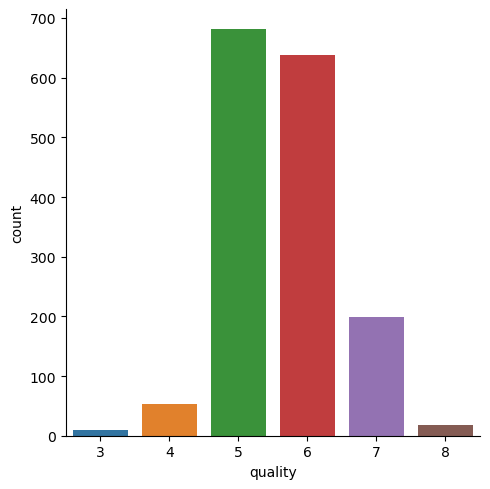

In [7]:
# Find number of wine of particular quality by catplot

sns.catplot(x='quality', data=wine_dataset, kind='count')

### Comparing the feature columns to the target column to check the relationship between them. 

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

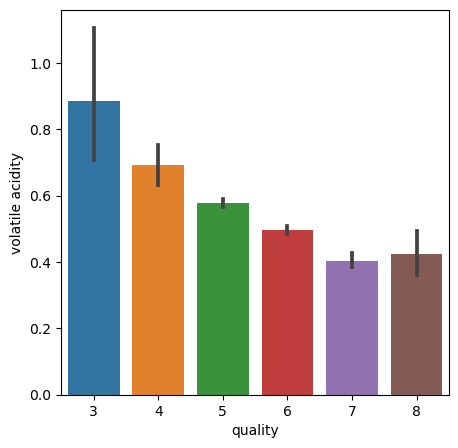

In [8]:
# volatile acidity vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=wine_dataset)

So in the above bar plot we can see that the volatile acidity is inversely proportional to quality. As the quality increase volatile acidity decrease.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

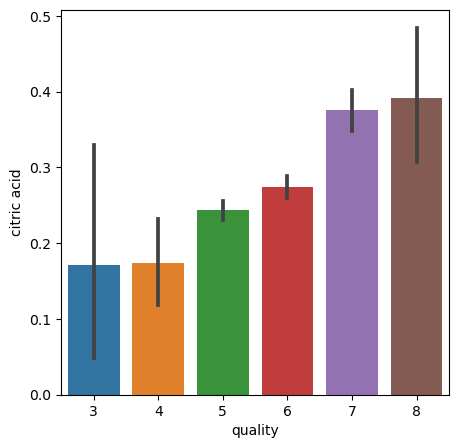

In [9]:
# citric acid vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=wine_dataset)

So in the above barplot we can see that the citric acid is directly proportional to quality. As the quality increase citric acid increase.

In [10]:
# Correlation
correlation = wine_dataset.corr()

<AxesSubplot:>

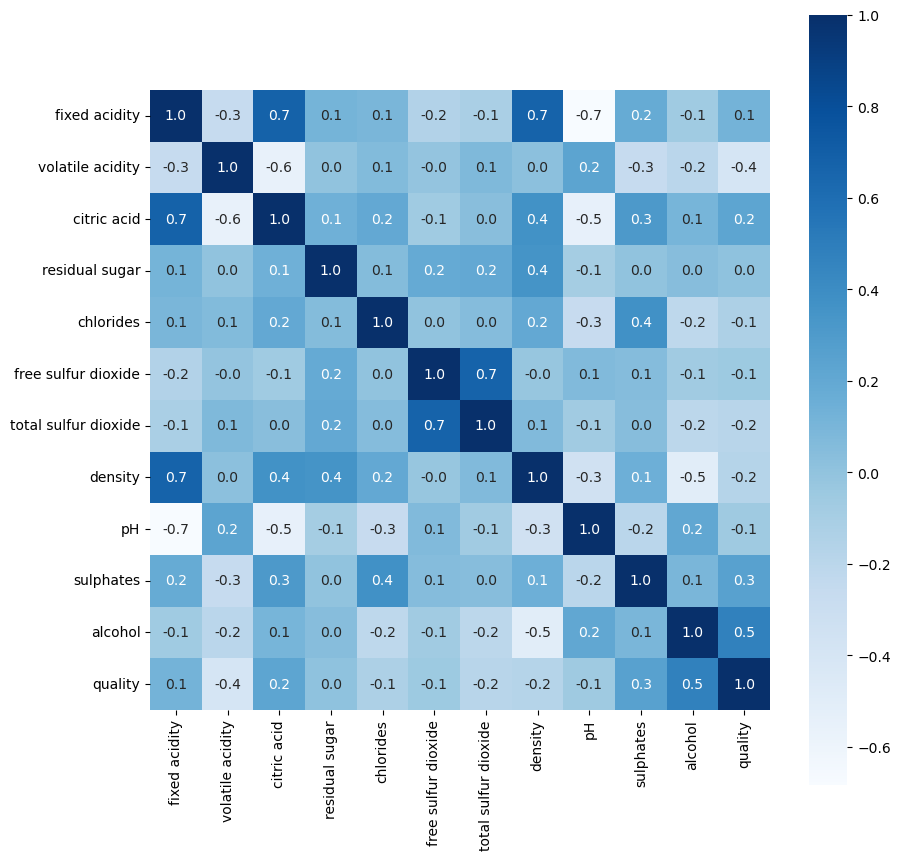

In [11]:
# Ploting the heatmap to understand the correlation between the columns.
plot = plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, annot=True, annot_kws={'size':10}, square=True, fmt='.1f', cmap='Blues')

In [12]:
# Seperating the data
x = wine_dataset.drop(columns='quality')

In [13]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### Label Binarization

In [14]:
# 1 for good quality and 0 for bad quality
y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [15]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [16]:
# Splitting the data into train and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [17]:
y.shape, y_test.shape, y_train.shape

((1599,), (528,), (1071,))

### Model Training 

In [18]:
rfc = RandomForestClassifier(n_estimators=10, random_state=0)

In [19]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [20]:
y_pred = rfc.predict(x_test)

In [21]:
model_accuracy = accuracy_score(y_pred, y_test)

In [22]:
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(model_accuracy))

Model accuracy score with 10 decision-trees : 0.8655


### Random Forest Classifier model with parameter n_estimators=100

In [23]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(x_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(x_test)

In [24]:
# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8788


The model accuracy score with 10 decision-trees is 0.8655 but the same with 100 decision-trees is 0.8788. So, as expected accuracy increases with number of decision-trees in the model.

### Find important features with Random Forest model

Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy.

First, I will create the Random Forest model as follows:-

In [25]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

Now, I will use the feature importance variable to see feature importance scores.

In [26]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

alcohol                 0.182016
sulphates               0.121185
volatile acidity        0.104146
density                 0.095663
citric acid             0.090521
total sulfur dioxide    0.076967
chlorides               0.073083
fixed acidity           0.068872
residual sugar          0.065742
pH                      0.064276
free sulfur dioxide     0.057530
dtype: float64

We can see that the most important feature is alcohol and least important feature is free sulfur dioxide.

### Visualize feature scores of the features

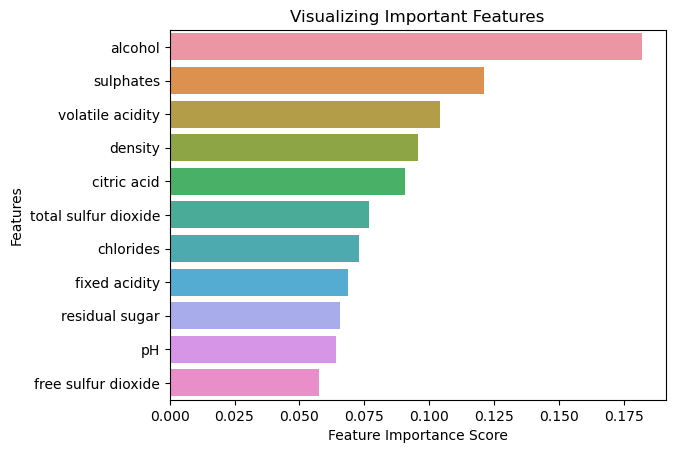

In [27]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

### Build Random Forest model on selected features

Now, I will drop the least important feature doors from the model, rebuild the model and check its effect on accuracy.

In [28]:
# declare feature vector and target variable

X = wine_dataset.drop(['quality', 'free sulfur dioxide', 'pH'], axis=1)
Y = wine_dataset['quality']

In [29]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,0.71,10.2


In [30]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [31]:
# Label Encoding
# 1 for good quality and 0 for bad quality
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [32]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [33]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [34]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)

# fit the model to the training set
clf.fit(X_train, Y_train)

# Predict on the test set results
y_pred = clf.predict(X_test)

In [35]:
# Check accuracy score 

print('Model accuracy score with free sulfur dioxide variable and pH removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with free sulfur dioxide variable and pH removed : 0.8902


I have removed the free sulfur dioxide and pH variable from the model, rebuild it and checked its accuracy. The accuracy of the model with free sulfur dioxide and pH variable removed is 0.8902. The accuracy of the model with all the variables taken into account is 0.8788. So, we can see that the model accuracy has been improved with free sulfur dioxide and pH variable removed from the model.

Furthermore, the third least important feature is residual sugar. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8864. It is a drop in the accuracy. So, I will not drop it from the model.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

### Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

In [36]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       451
           1       0.69      0.45      0.55        77

    accuracy                           0.89       528
   macro avg       0.80      0.71      0.74       528
weighted avg       0.88      0.89      0.88       528



In [37]:
import pickle

In [38]:
pickle.dump(clf,open('WineQualityPrediction_file','wb'))

In [39]:
clf_model = pickle.load(open('WineQualityPrediction_file','rb'))

In [40]:
prediction = clf_model.predict([[7.6,0.39,0.31,2.3,0.08200000000000000,71.0,0.9982,0.65,9.7]])

if (prediction[0]==1):
    print("Good Quality Wine")
else :
    print("Bad Quality Wine")

Bad Quality Wine
